# FIFA-21 PLAYERS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-complete-player-dataset/players_15.csv
/kaggle/input/fifa-21-complete-player-dataset/players_16.csv
/kaggle/input/fifa-21-complete-player-dataset/players_17.csv
/kaggle/input/fifa-21-complete-player-dataset/players_18.csv
/kaggle/input/fifa-21-complete-player-dataset/players_19.csv
/kaggle/input/fifa-21-complete-player-dataset/players_21.csv
/kaggle/input/fifa-21-complete-player-dataset/Career Mode player datasets - FIFA 15-21.xlsx
/kaggle/input/fifa-21-complete-player-dataset/players_20.csv


In [2]:
fifa = pd.read_csv('/kaggle/input/fifa-21-complete-player-dataset/players_21.csv')

In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [4]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penal

In [5]:
fifa.shape

(18944, 106)

In [6]:
fifa['nationality'].value_counts()

England             1685
Germany             1189
Spain               1072
France               984
Argentina            936
                    ... 
Bermuda                1
Barbados               1
Indonesia              1
Nicaragua              1
Papua New Guinea       1
Name: nationality, Length: 162, dtype: int64

In [7]:
fifa['nationality'].value_counts()[0:10]

England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
Brazil            887
Japan             489
Netherlands       432
Italy             421
United States     378
Name: nationality, dtype: int64

In [8]:
fifa['nationality'].value_counts()[0:5]

England      1685
Germany      1189
Spain        1072
France        984
Argentina     936
Name: nationality, dtype: int64

In [9]:
fifa['nationality'].value_counts()[0:5].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

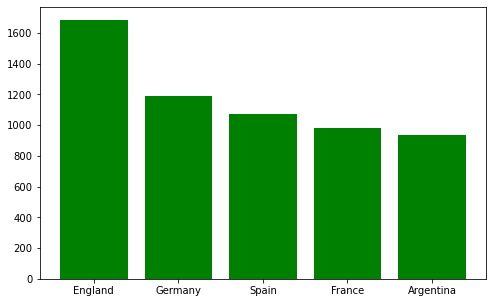

In [10]:
plt.figure(figsize=(8,5))
plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]),color='g')
plt.show()

In [11]:
player_salary = fifa[['short_name','wage_eur']]

In [12]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,560000
1,Cristiano Ronaldo,220000
2,J. Oblak,125000
3,R. Lewandowski,240000
4,Neymar Jr,270000


In [13]:
player_salary = player_salary.sort_values(by=['wage_eur'],ascending=False)

In [14]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,560000
5,K. De Bruyne,370000
15,K. Benzema,350000
25,E. Hazard,350000
24,T. Kroos,310000


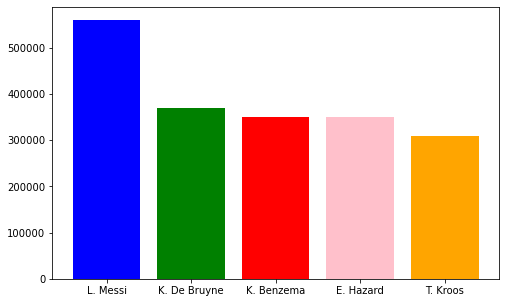

In [15]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color=["blue","green","red","pink","orange"])
plt.show()

In [16]:
fifa['nationality'] == 'Germany'

0        False
1        False
2        False
3        False
4        False
         ...  
18939    False
18940    False
18941    False
18942    False
18943    False
Name: nationality, Length: 18944, dtype: bool

In [17]:
# Germany
Germany = fifa[fifa['nationality'] == 'Germany']
Germany.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
16,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,34,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3
20,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,25,1995-02-08,176,73,Germany,FC Bayern München,...,84+3,85+3,85+3,85+3,84+3,83+3,80+3,80+3,80+3,83+3
24,182521,https://sofifa.com/player/182521/toni-kroos/21...,T. Kroos,Toni Kroos,30,1990-01-04,183,76,Germany,Real Madrid,...,77+3,81+3,81+3,81+3,77+3,74+3,71+3,71+3,71+3,74+3
55,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,31,1988-12-16,191,94,Germany,Borussia Dortmund,...,78+3,84+2,84+2,84+2,78+3,80+3,85+1,85+1,85+1,80+3


In [18]:
Germany.sort_values(by=['height_cm'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
9936,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,24,1996-02-07,199,90,Germany,SV Darmstadt 98,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
15909,239101,https://sofifa.com/player/239101/till-brinkman...,T. Brinkmann,Till Brinkmann,24,1995-11-01,199,94,Germany,SC Verl,...,19+2,22+2,22+2,22+2,19+2,19+2,23+2,23+2,23+2,19+2
14758,254022,https://sofifa.com/player/254022/nick-woltemad...,N. Woltemade,Nick Woltemade,18,2002-02-14,198,78,Germany,SV Werder Bremen,...,44+2,43+2,43+2,43+2,44+2,43+2,41+2,41+2,41+2,43+2
998,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,29,1990-07-20,198,103,Germany,PSV,...,25+2,29+2,29+2,29+2,25+2,25+2,28+2,28+2,28+2,25+2
8713,238503,https://sofifa.com/player/238503/leo-weinkauf/...,L. Weinkauf,Leo Weinkauf,23,1996-07-07,198,94,Germany,MSV Duisburg,...,18+2,20+2,20+2,20+2,18+2,18+2,21+2,21+2,21+2,18+2


In [19]:
Germany.sort_values(by=['weight_kg'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13491,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,24,1996-03-06,197,103,Germany,FC St. Gallen,...,18+2,22+2,22+2,22+2,18+2,18+2,23+2,23+2,23+2,18+2
998,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,29,1990-07-20,198,103,Germany,PSV,...,25+2,29+2,29+2,29+2,25+2,25+2,28+2,28+2,28+2,25+2
3436,158777,https://sofifa.com/player/158777/philipp-tscha...,P. Tschauner,Philipp Tschauner,34,1985-11-03,196,100,Germany,RB Leipzig,...,23+2,26+2,26+2,26+2,23+2,25+2,30+2,30+2,30+2,25+2
1045,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,31,1988-09-27,197,98,Germany,FC Schalke 04,...,26+2,28+2,28+2,28+2,26+2,25+2,28+2,28+2,28+2,25+2
2379,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,32,1987-11-22,198,97,Germany,Hannover 96,...,29+2,34+2,34+2,34+2,29+2,29+2,34+2,34+2,34+2,29+2


In [20]:
Germany.sort_values(by=['wage_eur'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
24,182521,https://sofifa.com/player/182521/toni-kroos/21...,T. Kroos,Toni Kroos,30,1990-01-04,183,76,Germany,Real Madrid,...,77+3,81+3,81+3,81+3,77+3,74+3,71+3,71+3,71+3,74+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
185,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,29,1990-10-24,180,80,Germany,Manchester City,...,77+3,79+3,79+3,79+3,77+3,74+3,72+3,72+3,72+3,74+3
20,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,25,1995-02-08,176,73,Germany,FC Bayern München,...,84+3,85+3,85+3,85+3,84+3,83+3,80+3,80+3,80+3,83+3
73,212188,https://sofifa.com/player/212188/timo-werner/2...,T. Werner,Timo Werner,24,1996-03-06,180,76,Germany,Chelsea,...,61+3,56+3,56+3,56+3,61+3,58+3,50+3,50+3,50+3,58+3


In [21]:
Germany[['short_name','wage_eur']].sort_values(by=['wage_eur'],ascending=False).head()

,short_name,wage_eur
24,T. Kroos,310000
7,M. ter Stegen,260000
185,I. Gündoğan,160000
20,J. Kimmich,145000
73,T. Werner,135000


In [22]:
# Shooting

In [23]:
player_shooting = fifa[['short_name','shooting']]

In [24]:
player_shooting.sort_values(by=['shooting'],ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
21,H. Kane,91.0
3,R. Lewandowski,91.0
37,L. Suárez,90.0


In [25]:
# Defending

In [26]:
player_defending = fifa[['short_name','defending','nationality','club_name']]

In [27]:
player_defending.sort_values(by=['defending'],ascending=False).head()

,short_name,defending,nationality,club_name
8,V. van Dijk,91.0,Netherlands,Liverpool
35,G. Chiellini,90.0,Italy,Juventus
55,M. Hummels,89.0,Germany,Borussia Dortmund
26,K. Koulibaly,89.0,Senegal,Napoli
31,A. Laporte,88.0,France,Manchester City


In [28]:
real_madrid = fifa[fifa['club_name'] == 'Real Madrid']

In [29]:
real_madrid.sort_values(by=['wage_eur'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,32,1987-12-19,185,81,France,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,59+3,55+3,55+3,55+3,59+3
25,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,29,1991-01-07,175,74,Belgium,Real Madrid,...,65+3,62+3,62+3,62+3,65+3,59+3,49+3,49+3,49+3,59+3
17,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,28,1992-02-23,185,84,Brazil,Real Madrid,...,80+3,86+3,86+3,86+3,80+3,81+3,86+3,86+3,86+3,81+3
24,182521,https://sofifa.com/player/182521/toni-kroos/21...,T. Kroos,Toni Kroos,30,1990-01-04,183,76,Germany,Real Madrid,...,77+3,81+3,81+3,81+3,77+3,74+3,71+3,71+3,71+3,74+3
14,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,34,1986-03-30,184,82,Spain,Real Madrid,...,81+3,85+3,85+3,85+3,81+3,83+3,88+1,88+1,88+1,83+3


In [30]:
real_madrid.sort_values(by=['shooting'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,32,1987-12-19,185,81,France,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,59+3,55+3,55+3,55+3,59+3
25,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,29,1991-01-07,175,74,Belgium,Real Madrid,...,65+3,62+3,62+3,62+3,65+3,59+3,49+3,49+3,49+3,59+3
389,232432,https://sofifa.com/player/232432/luka-jovic/21...,L. Jović,Luka Jović,22,1997-12-23,182,85,Serbia,Real Madrid,...,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2
24,182521,https://sofifa.com/player/182521/toni-kroos/21...,T. Kroos,Toni Kroos,30,1990-01-04,183,76,Germany,Real Madrid,...,77+3,81+3,81+3,81+3,77+3,74+3,71+3,71+3,71+3,74+3
1020,221639,https://sofifa.com/player/221639/mariano-diaz-...,Mariano,Mariano Díaz Mejía,26,1993-08-01,180,76,Dominican Republic,Real Madrid,...,58+2,58+2,58+2,58+2,58+2,57+2,58+2,58+2,58+2,57+2


In [31]:
real_madrid.sort_values(by=['defending'], ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
14,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,34,1986-03-30,184,82,Spain,Real Madrid,...,81+3,85+3,85+3,85+3,81+3,83+3,88+1,88+1,88+1,83+3
48,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,27,1993-04-25,191,81,France,Real Madrid,...,77+3,82+3,82+3,82+3,77+3,80+3,85+3,85+3,85+3,80+3
17,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,28,1992-02-23,185,84,Brazil,Real Madrid,...,80+3,86+3,86+3,86+3,80+3,81+3,86+3,86+3,86+3,81+3
60,204963,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,28,1992-01-11,173,73,Spain,Real Madrid,...,84+2,82+3,82+3,82+3,84+2,83+3,81+3,81+3,81+3,83+3
372,240130,https://sofifa.com/player/240130/eder-gabriel-...,Éder Militão,Éder Gabriel Militão,22,1998-01-18,186,78,Brazil,Real Madrid,...,78+2,77+2,77+2,77+2,78+2,79+2,80+2,80+2,80+2,79+2


In [32]:
real_madrid['nationality'].value_counts

<bound method IndexOpsMixin.value_counts of 12                  Belgium
14                    Spain
15                   France
17                   Brazil
24                  Germany
25                  Belgium
38                  Croatia
48                   France
60                    Spain
133                   Spain
140                 Uruguay
141                  Norway
148                  France
177                  Brazil
220                   Spain
366                  Brazil
372                  Brazil
389                  Serbia
479                   Spain
485                   Spain
504                  Brazil
562                   Spain
1020     Dominican Republic
1219                  Spain
1503                Ukraine
6374                  Spain
6378                  Spain
6391                  Spain
6397                  Spain
11029                 Spain
11895                 Spain
12976                 Spain
Name: nationality, dtype: object>